In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_compare(origin, noise):
    plt.figure(figsize=(10,10))
    size = int(len(origin)/10)

    for i in range(10):
        origin_img = origin[i*size:(i+1)*size]
        noise_img = noise[i*size:(i+1)*size]

        for j in range(5):   
            plt.subplot(10, 10, i + 2*j*10 + 1) # 행, 열, plot번호
            plt.imshow(origin_img[j].reshape(28, 28), cmap='gray')
            plt.axis('off')
            plt.subplot(10, 10, i + (2*j+1)*10 + 1) # 행, 열, plot번호
            plt.imshow(noise_img[j].reshape(28, 28), cmap='gray')
            plt.axis('off')

    plt.show()

In [3]:
def combine_generator(gen1, gen2):
    for (batch1, batch2) in zip(gen1, gen2):
        yield (batch1, batch2)

In [4]:
def img_to_array_generator(gen, steps):
    comb_list = []
    
    for i in range(steps):
        comb_list.extend(next(gen))
    
    return np.asarray(comb_list)

In [12]:
import keras

In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
img_gen = ImageDataGenerator(rescale=1.0/255)

In [8]:
train_origin = img_gen.flow_from_directory('../data/notMNIST/original/', target_size=(28, 28), color_mode='grayscale', class_mode=None, batch_size=100, shuffle=False)

Found 14000 images belonging to 10 classes.


In [9]:
train_noise = img_gen.flow_from_directory('../data/notMNIST/noise/', target_size=(28, 28), color_mode='grayscale', class_mode=None, batch_size=100, shuffle=False)

Found 14000 images belonging to 10 classes.


In [10]:
train_origin_array = img_to_array_generator(train_origin, 140)

In [11]:
train_origin_array.shape

(14000, 28, 28, 1)

In [12]:
train_noise_array = img_to_array_generator(train_noise, 140)

In [13]:
train_noise_array.shape

(14000, 28, 28, 1)

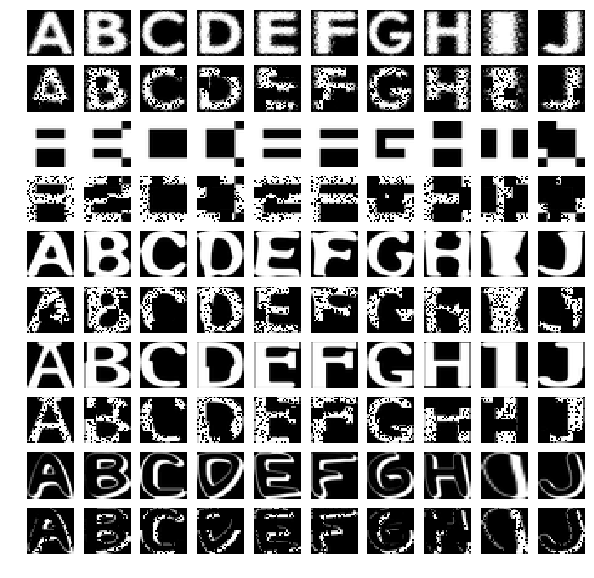

In [14]:
plot_compare(train_origin_array, train_noise_array)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer, Reshape

In [54]:
model = Sequential()

In [55]:
model.add(InputLayer((28, 28, 1,)))
model.add(Flatten())
model.add(Dense(300, activation='relu', input_shape=(784,)))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))

In [56]:
model.add(Dense(200, activation='relu'))
model.add(Dense(300, activation='relu'))
#relu 0~infi // sigmoid: 0~1.0
model.add(Dense(784, activation='sigmoid'))
model.add(Reshape((28,28,1,)))

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_20 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_21 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_22 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_23 (Dense)             (None, 300)               60300     
_________________________________________________________________
dense_24 (Dense)             (None, 784)               235984    
__________

In [58]:
#min squre error
model.compile(optimizer='adam', loss='mse')

In [59]:
#batch_size * steps_per_epoch = 140 000
model.fit_generator(combine_generator(train_noise, train_origin), steps_per_epoch=140, epochs=10)

Epoch 1/10
140/140 [==============================] - 8s 57ms/step - loss: 0.1852
Epoch 2/10
140/140 [==============================] - 7s 52ms/step - loss: 0.1504
Epoch 3/10
140/140 [==============================] - 7s 52ms/step - loss: 0.1316
Epoch 4/10
140/140 [==============================] - 7s 52ms/step - loss: 0.1228
Epoch 5/10
140/140 [==============================] - 7s 53ms/step - loss: 0.1153
Epoch 6/10
140/140 [==============================] - 7s 53ms/step - loss: 0.1072
Epoch 7/10
140/140 [==============================] - 7s 53ms/step - loss: 0.0987
Epoch 8/10
140/140 [==============================] - 8s 56ms/step - loss: 0.0905
Epoch 9/10
140/140 [==============================] - 7s 52ms/step - loss: 0.0830
Epoch 10/10
140/140 [==============================] - 7s 52ms/step - loss: 0.0763


In [60]:
pred_array = model.predict_generator(train_noise, steps=140)

In [61]:
pred_array = pred_array * 255

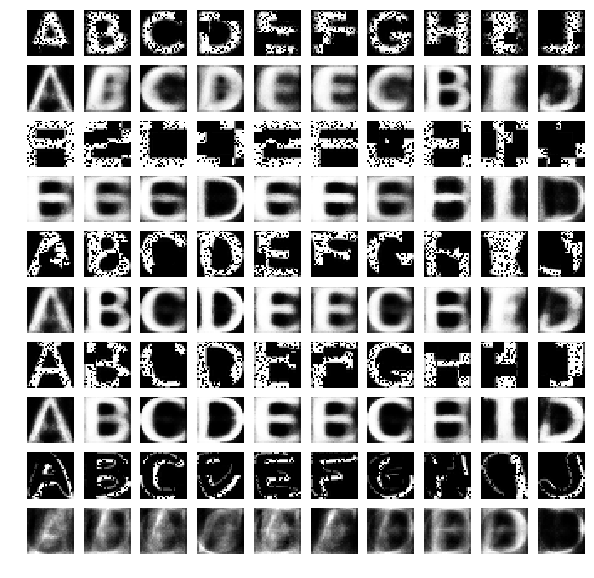

In [62]:
plot_compare(train_noise_array, pred_array)

In [63]:
model.save('../data/autoencoder')

In [65]:
model.to_json()

'{"class_name": "Sequential", "config": [{"class_name": "Flatten", "config": {"name": "flatten_3", "trainable": true, "data_format": "channels_last"}}, {"class_name": "Dense", "config": {"name": "dense_19", "trainable": true, "batch_input_shape": [null, 784], "dtype": "float32", "units": 300, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_20", "trainable": true, "units": 200, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {

In [ ]:
model2 = keras.models.model_from_json

In [45]:
model2 = Sequential()

In [46]:
model2.add(InputLayer((28, 28, 1,)))
model2.add(Flatten())
model2.add(Dense(300, activation='relu', input_shape=(784,)))
model2.add(Dense(200, activation='relu'))
model2.add(Dense(100, activation='relu'))

model2.add(Dense(200, activation='relu'))
model2.add(Dense(300, activation='relu'))
#relu 0~infi // sigmoid: 0~1.0
model2.add(Dense(784, activation='sigmoid'))
model2.add(Reshape((28,28,1,)))

In [53]:


#before load make same model
model2 = keras.models.load_model('../data/autoencoder')

ValueError: You are trying to load a weight file containing 6 layers into a model with 0 layers.

In [8]:
from keras.models import Model

In [9]:
from keras.layers import Input, Concatenate

In [10]:
input_layer = Input(shape=(28,28,1))

In [15]:
input_flat = Flatten()(input_layer)

In [16]:
h1 = Dense(200, activation='relu')(input_flat)

In [17]:
h1_ = Dense(200, activation='relu')(input_flat)

In [18]:
concat_h1 = Concatenate()([h1, h1_])

In [19]:
output_layer = Dense(10, activation='softmax')(concat_h1)

In [20]:
model3 = Model(inputs=[input_layer], outputs = [output_layer])

In [21]:
model3.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 200)          157000      flatten_1[0][0]                  
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 200)          157000      flatten_1[0][0]                  
__________________________________________________________________________________________________
concatenat

In [22]:
from keras.utils import plot_model

In [29]:
plot_model(model3, show_shapes=True, to_file='./model.png')

In [30]:
from keras.backend import tensorflow_backend as K

In [31]:
#lecture cs231n(image) cs22u cs224n(image+language)